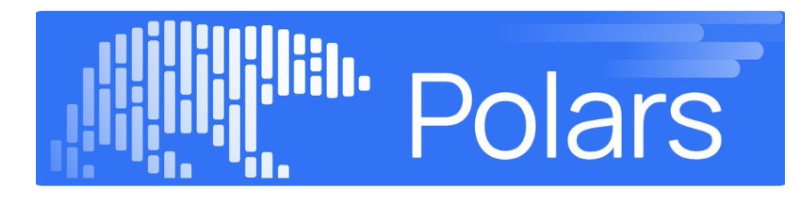

In [ ]:
# Librerías
import pandas as pd
import polars as pl
import numpy as np
import time

In [ ]:
# Datos
n = 20_000_000
data = {
    "valor": np.random.randn(n),
    "categoria": np.random.choice(["A", "B", "C", "D"], n)
}

In [ ]:
# PANDAS
df_pd = pd.DataFrame(data)

start = time.time()
resultado_pd = df_pd.groupby("categoria").agg({"valor": ["sum"]})
end = time.time()

print("Tiempo de ejecución:",end - start,"segundos")

resultado_pd

Tiempo de ejecución: 1.3648924827575684 segundos


,valor
,sum
categoria,
A,414.646608
B,-1209.859834
C,2251.658635
D,4404.033217


In [ ]:
# POLARS
df_pl = pl.DataFrame(data)

start = time.time()
resultado_pl = df_pl.group_by("categoria").agg(pl.col("valor").sum())
end = time.time()

print("Tiempo de ejecución:",end - start,"segundos")

resultado_pl

Tiempo de ejecución: 1.4279658794403076 segundos


categoria,valor
str,f64
"""A""",414.646608
"""C""",2251.658635
"""D""",4404.033217
"""B""",-1209.859834


In [ ]:
%reset -f